<a href="https://colab.research.google.com/github/KhurramDevOps/Quarter-02/blob/master/Langchain_project_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [4]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00


In [5]:
from langchain_google_genai import GoogleGenerativeAI
from langchain.prompts import PromptTemplate


In [6]:

first_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change this {question} into a good image generation promt?"
)

second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)


In [35]:
llm = GoogleGenerativeAI(
    api_key = GOOGLE_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.7,
    max_output_tokens = 76
)

In [36]:
first_chain = first_prompt | llm
second_chain = second_prompt | llm

In [39]:
from diffusers import StableDiffusionPipeline
import torch


In [41]:
first_response = first_chain.invoke({"question" : input(" write to create image ! : ")})
print("First chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("Second chain " , second_response)

# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image ...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response).images[0]

# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")






 write to create image ! : create image of k2
First chain  To get a good image generation prompt, we need more specifics!  "Create image of K2" is too vague.  Here are some options, depending on what kind of image you want:

**Option 1 (Photorealistic):**

> A photorealistic image of K2, the second highest mountain in the world, at sunrise, with clear skies and a
Second chain  Photorealistic image of K2 at sunrise, clear skies.  High-resolution, detailed mountain landscape.


Generating the image ...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


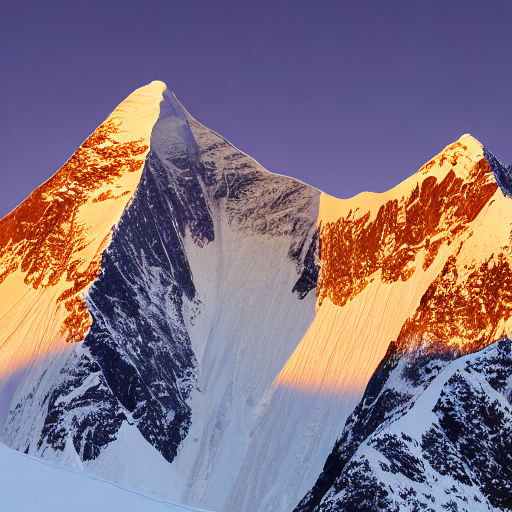

In [42]:
image